In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('preprocessed_data.csv')
print(f"Loaded {len(df)} reviews")
print(df.head())

Loaded 2912 reviews
                                              Review Sentiment  Label
0  nice good quality price rising bad sign afford...  Positive      1
1  didnt supplied yonex mavis outside cover yonex...  Negative      0
2  worst damaged shuttlecock packed new box origi...  Negative      0
3  pricedjust retaileri didnt understand wat adva...  Negative      0
4                    good quality delivered timeread  Positive      1


In [6]:
#Split Data
X = df['Review']  
y = df['Label']   

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      
    random_state=42,    
    stratify=y)          


print(f"Data split complete!")
print(f"Training set: {len(X_train)} reviews")
print(f"Testing set:  {len(X_test)} reviews")


Data split complete!
Training set: 2329 reviews
Testing set:  583 reviews


In [7]:
#Convert Text to Numbers(TF-IDF)
tfidf = TfidfVectorizer(
    max_features=5000,   
    ngram_range=(1, 2))   


X_train_tfidf = tfidf.fit_transform(X_train)

X_test_tfidf = tfidf.transform(X_test)

print(f"Conversion complete!")
print(f"Shape: {X_train_tfidf.shape}")
print(f"This means: {X_train_tfidf.shape[0]} reviews, {X_train_tfidf.shape[1]} features")

Conversion complete!
Shape: (2329, 5000)
This means: 2329 reviews, 5000 features


In [8]:
#Train The Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [9]:
#Test the Model 

y_pred = model.predict(X_test_tfidf)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"RESULTS:")
print(f"Accuracy:  {accuracy*100:.2f}%")
print(f"F1-Score:  {f1:.4f}")

print("\nDetailed Report:")
print(classification_report(y_test, y_pred, 
                          target_names=['Negative', 'Positive']))

RESULTS:
Accuracy:  89.19%
F1-Score:  0.9350

Detailed Report:
              precision    recall  f1-score   support

    Negative       0.96      0.53      0.68       127
    Positive       0.88      0.99      0.93       456

    accuracy                           0.89       583
   macro avg       0.92      0.76      0.81       583
weighted avg       0.90      0.89      0.88       583



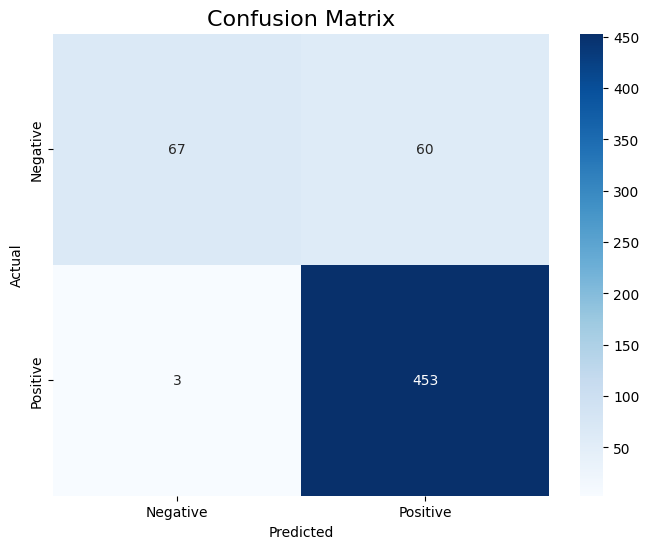


What this means:
Correctly predicted negative: 67
Wrongly predicted negative as positive: 60
Wrongly predicted positive as negative: 3
Correctly predicted positive: 453


In [10]:
#Confusion Matrix(Visual Results)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Negative', 'Positive'],
           yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\nWhat this means:")
print(f"Correctly predicted negative: {cm[0][0]}")
print(f"Wrongly predicted negative as positive: {cm[0][1]}")
print(f"Wrongly predicted positive as negative: {cm[1][0]}")
print(f"Correctly predicted positive: {cm[1][1]}")

In [11]:
import joblib

joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print("Model saved!")

Model saved!


In [13]:
def predict_review(review_text):

    model = joblib.load('sentiment_model.pkl')
    tfidf = joblib.load('tfidf_vectorizer.pkl')
    
    
    review_tfidf = tfidf.transform([review_text])
    
    
    prediction = model.predict(review_tfidf)[0]
    probability = model.predict_proba(review_tfidf)[0]
    
    sentiment = "POSITIVE" if prediction == 1 else "NEGATIVE"
    confidence = max(probability) * 100
    
    return sentiment, confidence


test_reviews = [
    "This product is amazing! Great quality!",
    "Worst purchase ever. Complete waste of money.",
    "Good product but a bit expensive"
]

print("Testing the model:\n")
for review in test_reviews:
    sentiment, confidence = predict_review(review)
    print(f"Review: {review}")
    print(f"Prediction: {sentiment} ({confidence:.1f}% confident)")
    print("-" * 60)

Testing the model:

Review: This product is amazing! Great quality!
Prediction: POSITIVE (86.0% confident)
------------------------------------------------------------
Review: Worst purchase ever. Complete waste of money.
Prediction: NEGATIVE (74.0% confident)
------------------------------------------------------------
Review: Good product but a bit expensive
Prediction: POSITIVE (86.8% confident)
------------------------------------------------------------
